In [3]:
import statisUtils as utils
import pandas as pd
import numpy as np
import random
from scipy.stats import loguniform, lognorm
from scipy import stats
import time
import math

from matplotlib import pyplot as plt

In [4]:
gene_no, gene, result = np.load('data/posterior/gene_1.npy', allow_pickle='True')

In [5]:
result[:1]

array([[[{'kon': 4.895256461486023, 'ron': 8.50632574476378, 'koff': 2.3452357127131043, 'roff': 1.009529352894959, 'mu': 49.218151895794755, 'delta': 1.0, 'dist': 0.5496806049729397}],
        [{'kon': 5.318321006887795, 'ron': 10.757593405968096, 'koff': 4.178735506295902, 'roff': 2.7142360247614508, 'mu': 48.31762032400055, 'delta': 1, 'dist': 0.6073729058241008}],
        [{'kon': 3.7154568811731568, 'ron': 18.46881935600579, 'koff': 0.6341717588484515, 'roff': 1.1085402381332605, 'mu': 53.00612207327685, 'delta': 1, 'dist': 0.499141260851978}],
        [{'kon': 5.273628924747292, 'ron': 9.434462739483418, 'koff': 4.881186021333964, 'roff': 2.83991172769823, 'mu': 83.8454379679111, 'delta': 1, 'dist': 0.36025444675249374}],
        [{'kon': 10.487215658239283, 'ron': 18.855544913441307, 'koff': 1.7322869433308996, 'roff': 0.8933443007342595, 'mu': 64.30385792005883, 'delta': 1, 'dist': 0.27626428023510213}]]],
      dtype=object)

In [6]:
result_flatten = result.flatten()
kon = np.array([d['kon'] for d in result_flatten])
ron = np.array([d['ron'] for d in result_flatten])
koff = np.array([d['koff'] for d in result_flatten])
roff = np.array([d['roff'] for d in result_flatten])
mu = np.array([d['mu'] for d in result_flatten])
dist = np.array([d['dist'] for d in result_flatten])

# tau_off = kon/ron
# tau_on = koff/roff
# bf = 1./(tau_on + tau_off)
# bs = mu * tau_on

In [7]:
tau_off = kon/ron
tau_on = koff/roff
bf = 1./(tau_on + tau_off)
bs = mu * tau_on

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


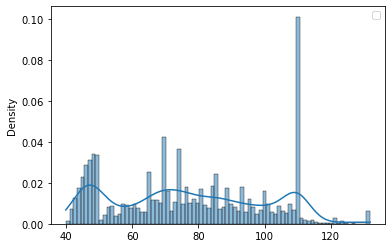

In [10]:
import seaborn as sns
sns.histplot(mu, stat='density', bins=82, kde=True);
# x0, x1 = (20,80)  # extract the endpoints for the x-axis
# x_pdf = np.linspace(x0, x1, 100)
# y_pdf = stats.norm.pdf(x_pdf)

# plt.plot(x_pdf, y_pdf, 'r', lw=2, label='pdf')                                                   
plt.legend()

C:\Users\shrr\Miniconda3\envs\scvelo3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

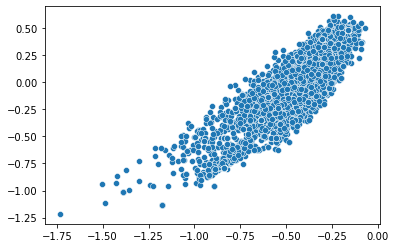

In [14]:
sns.scatterplot(np.log10(tau_off),np.log10(tau_on))

C:\Users\shrr\Miniconda3\envs\scvelo3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

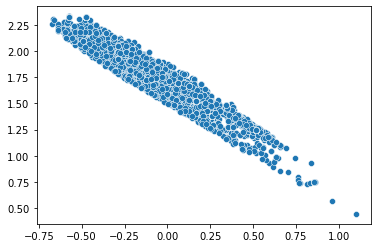

In [15]:
sns.scatterplot(np.log10(bf),np.log10(bs))